# **Predictive Modelling of Energy Consumption on UBC Campus Using Machine Learning**
### Christin Wang, Zexi Ren, Darcey Lyu ###

# **1. Introduction**

As one of Canada's leading research universities, UBC has a variety of buildings ranging from laboratories and teaching buildings to student dormitories and recreational facilities, each with unique energy requirements. Effective management of these energy consumptions is crucial, as it not only saves costs but also supports UBC's sustainable development plan. 

UBC is committed to reducing carbon emissions through its Climate Action Plan 2030 (CAP 2030), with the goal of achieving net zero emissions by 2035. This goal builds on the success of CAP 2020, which significantly reduced greenhouse gas emissions while expanding its campus. The key to achieving these goals is to understand and optimize the energy use of different buildings. UBC's innovative energy systems, such as bioenergy research Demonstration facilities and Campus Energy Centre(CEC), demonstrate its commitment to sustainable energy management. 

The dataset chosen for this project is the Building Energy and Water Data published by UBC Energy & Water Services as part of UBC’s Campus as a Living Lab initiative.

The enormous database is split into 4 major parts.
- Buildings: containing building summary and utility data.
- Energy: shows electrical, water, and gas usage (sum over 10 min) based on different time periods.
- Historian: contains analyzed historical weather data.
- Weather: shows present, forecasted, and historical weather data including humidity, temperature, and daytime.

According to Amasyali, K., & El-Gohary, N. M., there are 2 main approaches for building energy consumption prediction. One is the physical modelling approach, which requires building construction details, operation schedules, energy consumption, and weather information. The other one is a data-driven approach, which builds on prediction modelling and learns from historical/available data for prediction.

We aim to merge sectors from the 4 major datasets and form 1 dataset containing key factors that will influence energy consumption.

## **Objective**
Large university campuses like UBC’s energy consumption can fluctuate due to a variety of factors, such as the type of building, weather conditions, whether or not it is in an academic semester, and so on. To better understand the energy consumption of the campus and make predictions about future consumption would align with UBC’s sustainability goals and allow the university to manage energy more efficiently, save costs and reduce carbon emissions. In this project, we will try to use machine learning techniques to create predictive models of energy consumption in different buildings on the UBC campus. The model can provide insights into future energy consumption trends to help UBC plan for future energy needs and conserve energy effectively.


## **Research Questions**
1. What is the current building energy consumption of the campus?

1. What are the key factors that influence energy consumption across different building types(e.g. Academic, Residential, Research)?

1. How accurate are the predictions that are made with machine learning?

1. How can UBC use the results to optimize energy usage and reduce costs?


# **2. Data Import & Cleaning**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.transforms as transforms
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn import linear_model
from itertools import cycle
%matplotlib inline

Import the data, remove units and convert to numeric.

In [5]:
url = "https://raw.githubusercontent.com/Speculatorrr/ECON323_Project/refs/heads/main/Building_Energy_data.csv"
url2 = "https://raw.githubusercontent.com/Speculatorrr/ECON323_Project/refs/heads/main/Weather_History.csv"
url3 = "https://raw.githubusercontent.com/Speculatorrr/ECON323_Project/refs/heads/main/Electricity_Rate.csv"

In [6]:
df = pd.read_csv(url)
df.head()

,id,shortName,longName,Type,bldgNum,yearBuilt,area,Electrical EUI 2023,Hot Water EUI 2023,Gas EUI 2023,...,2023/12/22.1,2023/12/23.1,2023/12/24.1,2023/12/25.1,2023/12/26.1,2023/12/27.1,2023/12/28.1,2023/12/29.1,2023/12/30.1,2023/12/31.1
0,AERL,AERL,Aquatic Ecosystems Research Laboratory,Academic,316,2005.0,5368.0m²,63.0kWh/m²,78.6kWh/m²,0,...,1883.3kWh,2118.8kWh,2155.0kWh,1781.0kWh,1602.3kWh,1456.0kWh,1399.8kWh,1358.3kWh,1237.8kWh,1428.0kWh
1,Allard Hall,ALRD,Allard Hall,Academic,482,2011.0,14909.0m²,126.8kWh/m²,0,10.8kWh/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alumni Centre,ALUM,Robert H Lee Alumni Centre,Recreational,797,2015.0,4106.0m²,119.3kWh/m²,39.4kWh/m²,4.0kWh/m²,...,460.0kWh,213.0kWh,469.0kWh,236.0kWh,247.0kWh,551.0kWh,518.0kWh,543.0kWh,377.0kWh,486.0kWh
3,AMS Nest,NSUB,AMS Student Nest,Recreational,795,2015.0,22933.0m²,121.6kWh/m²,0,20.3kWh/m²,...,5670.0kWh,5601.0kWh,6140.0kWh,3120.0kWh,2929.0kWh,3781.0kWh,3960.0kWh,3490.0kWh,4460.0kWh,4250.0kWh
4,Ansoc,ANSO,Anthropology and Sociology Building,Academic,048,1950.0,6220.0m²,68.2kWh/m²,93.7kWh/m²,0,...,2280.0kWh,2970.0kWh,2850.0kWh,2970.0kWh,2400.0kWh,1640.0kWh,1809.5kWh,1020.0kWh,640.5kWh,2470.0kWh


In [7]:
data = pd.read_csv(url2) 
data.head()

,Timestamp,UBC Humidity,UBC Temp
0,31/01/2020,90.0%RH,5.5°C
1,29/02/2020,86.5%RH,4.8°C
2,31/03/2020,76.4%RH,6.1°C
3,30/04/2020,72.1%RH,10.0°C
4,31/05/2020,73.9%RH,14.0°C


In [8]:
Erate = pd.read_csv(url3) 
Erate.head()

,Timestamp,Electricity Rate
0,31/01/2020,6.53
1,29/02/2020,6.53
2,31/03/2020,6.53
3,30/04/2020,6.53
4,31/05/2020,6.53


In [9]:
for col in df.columns[6:]:
    if df[col].dtype == 'object':  
        df[col] = df[col].str.replace(r"[^\d.]", "", regex=True)  #asked gpt how to take the units out
        df[col] = pd.to_numeric(df[col], errors="coerce") 


df.head()

,id,shortName,longName,Type,bldgNum,yearBuilt,area,Electrical EUI 2023,Hot Water EUI 2023,Gas EUI 2023,...,2023/12/22.1,2023/12/23.1,2023/12/24.1,2023/12/25.1,2023/12/26.1,2023/12/27.1,2023/12/28.1,2023/12/29.1,2023/12/30.1,2023/12/31.1
0,AERL,AERL,Aquatic Ecosystems Research Laboratory,Academic,316,2005.0,5368.0,63.0,78.6,0.0,...,1883.3,2118.8,2155.0,1781.0,1602.3,1456.0,1399.8,1358.3,1237.8,1428.0
1,Allard Hall,ALRD,Allard Hall,Academic,482,2011.0,14909.0,126.8,0.0,10.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alumni Centre,ALUM,Robert H Lee Alumni Centre,Recreational,797,2015.0,4106.0,119.3,39.4,4.0,...,460.0,213.0,469.0,236.0,247.0,551.0,518.0,543.0,377.0,486.0
3,AMS Nest,NSUB,AMS Student Nest,Recreational,795,2015.0,22933.0,121.6,0.0,20.3,...,5670.0,5601.0,6140.0,3120.0,2929.0,3781.0,3960.0,3490.0,4460.0,4250.0
4,Ansoc,ANSO,Anthropology and Sociology Building,Academic,048,1950.0,6220.0,68.2,93.7,0.0,...,2280.0,2970.0,2850.0,2970.0,2400.0,1640.0,1809.5,1020.0,640.5,2470.0


In [10]:
df_new = df.drop(["longName","bldgNum","yearBuilt","id"],axis=1)

In [11]:
df_new

,shortName,Type,area,Electrical EUI 2023,Hot Water EUI 2023,Gas EUI 2023,Electrical EUI 2022,Hot Water EUI 2022,Gas EUI 2022,Electrical EUI 2021,...,2023/12/22.1,2023/12/23.1,2023/12/24.1,2023/12/25.1,2023/12/26.1,2023/12/27.1,2023/12/28.1,2023/12/29.1,2023/12/30.1,2023/12/31.1
0,AERL,Academic,5368.0,63.0,78.6,0.0,0.0,74.5,0.0,62.3,...,1883.3,2118.8,2155.0,1781.0,1602.3,1456.0,1399.8,1358.3,1237.8,1428.0
1,ALRD,Academic,14909.0,126.8,0.0,10.8,122.0,0.0,35.4,122.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUM,Recreational,4106.0,119.3,39.4,4.0,117.9,48.6,9.2,108.3,...,460.0,213.0,469.0,236.0,247.0,551.0,518.0,543.0,377.0,486.0
3,NSUB,Recreational,22933.0,121.6,0.0,20.3,125.0,0.0,17.0,115.6,...,5670.0,5601.0,6140.0,3120.0,2929.0,3781.0,3960.0,3490.0,4460.0,4250.0
4,ANSO,Academic,6220.0,68.2,93.7,0.0,67.4,85.4,0.0,62.8,...,2280.0,2970.0,2850.0,2970.0,2400.0,1640.0,1809.5,1020.0,640.5,2470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,LTKUC,Academic,3944.0,109.4,0.0,0.0,109.4,180.8,0.0,108.7,...,2330.0,1480.0,3010.0,2610.0,2610.0,1350.0,940.0,960.0,980.0,1250.0
118,USB,Administrative,11598.0,174.4,0.0,0.0,179.2,0.0,0.0,167.0,...,4.7,4.8,4.8,4.2,4.0,3.7,3.7,3.4,3.1,3.8
119,MGYM,Recreational,8945.0,48.4,97.7,0.0,45.5,122.6,0.0,40.2,...,3500.0,4100.0,2500.0,2301.0,2199.0,4400.0,3000.0,2700.0,2201.0,2199.0
120,WESB,Academic,10272.0,48.0,117.8,0.0,56.7,149.9,0.0,56.5,...,5270.0,5429.0,5881.0,3980.0,3960.0,3460.0,3500.0,3240.0,3309.0,4221.0


**I removed several columns, including "longName," "bldgNum," "yearBuilt," "area," and "id." These columns were redundant and irrelevant.**

## **2.1 Electrical energy use from 2020 to 2023**

In [12]:
df1 = df_new.drop(df_new.columns[3:15], axis=1)

In [13]:
df1

,shortName,Type,area,2020/1/1,2020/1/2,2020/1/3,2020/1/4,2020/1/5,2020/1/6,2020/1/7,...,2023/12/22.1,2023/12/23.1,2023/12/24.1,2023/12/25.1,2023/12/26.1,2023/12/27.1,2023/12/28.1,2023/12/29.1,2023/12/30.1,2023/12/31.1
0,AERL,Academic,5368.0,992.5,1224.5,1170.5,935.0,1005.0,1391.5,1404.0,...,1883.3,2118.8,2155.0,1781.0,1602.3,1456.0,1399.8,1358.3,1237.8,1428.0
1,ALRD,Academic,14909.0,3352.5,6211.0,5677.5,4762.0,3464.5,6374.0,5906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUM,Recreational,4106.0,1114.8,1640.3,1528.0,1505.0,1432.5,1795.0,1701.5,...,460.0,213.0,469.0,236.0,247.0,551.0,518.0,543.0,377.0,486.0
3,NSUB,Recreational,22933.0,5766.5,6931.5,7539.5,7095.5,7090.0,9060.0,9085.0,...,5670.0,5601.0,6140.0,3120.0,2929.0,3781.0,3960.0,3490.0,4460.0,4250.0
4,ANSO,Academic,6220.0,969.5,1269.0,1292.0,917.0,1006.5,1561.5,1564.0,...,2280.0,2970.0,2850.0,2970.0,2400.0,1640.0,1809.5,1020.0,640.5,2470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,LTKUC,Academic,3944.0,1221.5,1519.0,1389.5,1406.5,1452.5,1766.5,1716.5,...,2330.0,1480.0,3010.0,2610.0,2610.0,1350.0,940.0,960.0,980.0,1250.0
118,USB,Administrative,11598.0,5062.5,6288.8,6206.5,5094.8,5020.3,6765.8,6692.3,...,4.7,4.8,4.8,4.2,4.0,3.7,3.7,3.4,3.1,3.8
119,MGYM,Recreational,8945.0,1210.8,1593.3,1384.8,1167.0,1155.3,1669.0,1718.3,...,3500.0,4100.0,2500.0,2301.0,2199.0,4400.0,3000.0,2700.0,2201.0,2199.0
120,WESB,Academic,10272.0,1113.3,1686.1,1570.4,1058.5,1067.2,1887.9,1809.0,...,5270.0,5429.0,5881.0,3980.0,3960.0,3460.0,3500.0,3240.0,3309.0,4221.0


In [14]:
df_EEU = df1.drop(df1.columns[1464:2925], axis=1)

In [15]:
df_EEU.rename(columns={col: pd.to_datetime(col) for col in df_EEU.columns[3:]}, inplace=True)

df_EEU

,shortName,Type,area,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,...,2023-12-22 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
0,AERL,Academic,5368.0,992.5,1224.5,1170.5,935.0,1005.0,1391.5,1404.0,...,887.0,740.0,747.0,784.0,822.0,843.0,785.0,777.0,730.0,764.0
1,ALRD,Academic,14909.0,3352.5,6211.0,5677.5,4762.0,3464.5,6374.0,5906.0,...,5094.4,4359.3,3782.1,4596.3,4425.8,4394.5,4341.6,4341.3,4050.9,3500.0
2,ALUM,Recreational,4106.0,1114.8,1640.3,1528.0,1505.0,1432.5,1795.0,1701.5,...,922.5,539.0,572.0,574.5,654.0,814.0,819.0,831.5,729.5,761.5
3,NSUB,Recreational,22933.0,5766.5,6931.5,7539.5,7095.5,7090.0,9060.0,9085.0,...,6999.5,5529.5,5517.5,4743.0,4543.0,4858.0,4861.0,4852.5,5335.0,5217.0
4,ANSO,Academic,6220.0,969.5,1269.0,1292.0,917.0,1006.5,1561.5,1564.0,...,1046.5,1027.5,1044.0,1025.0,968.0,951.5,951.5,950.5,911.0,944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,LTKUC,Academic,3944.0,1221.5,1519.0,1389.5,1406.5,1452.5,1766.5,1716.5,...,912.5,807.5,911.5,913.5,914.5,813.0,757.5,746.5,743.0,763.5
118,USB,Administrative,11598.0,5062.5,6288.8,6206.5,5094.8,5020.3,6765.8,6692.3,...,6044.9,5071.6,4998.5,5069.4,5092.9,5235.9,5236.9,5319.4,4953.4,4979.6
119,MGYM,Recreational,8945.0,1210.8,1593.3,1384.8,1167.0,1155.3,1669.0,1718.3,...,849.5,728.5,657.5,608.0,633.0,1002.0,923.0,994.5,790.0,704.5
120,WESB,Academic,10272.0,1113.3,1686.1,1570.4,1058.5,1067.2,1887.9,1809.0,...,1089.8,840.8,908.8,851.5,837.5,939.5,934.0,901.3,803.8,879.8


In [16]:
df_EEU.set_index("Type").T.index[3:]

Index([2020-01-02 00:00:00, 2020-01-03 00:00:00, 2020-01-04 00:00:00,
       2020-01-05 00:00:00, 2020-01-06 00:00:00, 2020-01-07 00:00:00,
       2020-01-08 00:00:00, 2020-01-09 00:00:00, 2020-01-10 00:00:00,
       2020-01-11 00:00:00,
       ...
       2023-12-22 00:00:00, 2023-12-23 00:00:00, 2023-12-24 00:00:00,
       2023-12-25 00:00:00, 2023-12-26 00:00:00, 2023-12-27 00:00:00,
       2023-12-28 00:00:00, 2023-12-29 00:00:00, 2023-12-30 00:00:00,
       2023-12-31 00:00:00],
      dtype='object', length=1460)

## **2.2 Hot water energy use from 2020 to 2023**

In [17]:
df_HWE = df1.drop(df1.columns[3:1464], axis=1)

In [18]:
#We asked gpt how to remove the .1 from the column names
df_HWE.columns = df_HWE.columns.str.replace(r"\.1$", "", regex=True)

In [19]:
df_HWE.rename(columns={col: pd.to_datetime(col) for col in df_HWE.columns[3:]}, inplace=True)

df_HWE

,shortName,Type,area,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,...,2023-12-22 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
0,AERL,Academic,5368.0,1311.0,2142.0,1728.0,1591.9,1654.1,1912.9,1781.0,...,1883.3,2118.8,2155.0,1781.0,1602.3,1456.0,1399.8,1358.3,1237.8,1428.0
1,ALRD,Academic,14909.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUM,Recreational,4106.0,429.0,1217.0,1294.0,1310.0,954.0,1472.0,1244.0,...,460.0,213.0,469.0,236.0,247.0,551.0,518.0,543.0,377.0,486.0
3,NSUB,Recreational,22933.0,4220.0,7260.0,6740.0,5970.0,5560.0,7250.0,6490.0,...,5670.0,5601.0,6140.0,3120.0,2929.0,3781.0,3960.0,3490.0,4460.0,4250.0
4,ANSO,Academic,6220.0,1730.0,2110.0,2080.0,520.0,20.0,2750.0,3760.0,...,2280.0,2970.0,2850.0,2970.0,2400.0,1640.0,1809.5,1020.0,640.5,2470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,LTKUC,Academic,3944.0,1669.8,3940.3,2950.0,3359.8,3380.3,2720.0,2580.0,...,2330.0,1480.0,3010.0,2610.0,2610.0,1350.0,940.0,960.0,980.0,1250.0
118,USB,Administrative,11598.0,3.6,6.1,4.3,3.2,3.6,5.9,4.3,...,4.7,4.8,4.8,4.2,4.0,3.7,3.7,3.4,3.1,3.8
119,MGYM,Recreational,8945.0,7800.0,9300.0,7300.0,6700.0,6100.5,5799.5,6500.0,...,3500.0,4100.0,2500.0,2301.0,2199.0,4400.0,3000.0,2700.0,2201.0,2199.0
120,WESB,Academic,10272.0,6170.0,8949.8,7550.3,6000.0,8070.0,9129.8,7540.0,...,5270.0,5429.0,5881.0,3980.0,3960.0,3460.0,3500.0,3240.0,3309.0,4221.0


# **2.3 Different types of buildings**

**Through such classification, we will handle data faster and more accurate to analyze a single type of building.**

# **2.4 Weather Historical**

In [20]:
data = pd.read_csv(url2) 
data.head()

,Timestamp,UBC Humidity,UBC Temp
0,31/01/2020,90.0%RH,5.5°C
1,29/02/2020,86.5%RH,4.8°C
2,31/03/2020,76.4%RH,6.1°C
3,30/04/2020,72.1%RH,10.0°C
4,31/05/2020,73.9%RH,14.0°C


In [21]:
data["UBC Humidity"] = data["UBC Humidity"].str.replace(r"[^\d.]", "", regex=True).astype(float)
data["UBC Temp"] = data["UBC Temp"].str.replace(r"[^\d.]", "", regex=True).astype(float)
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%d/%m/%Y", dayfirst =True)
data = data.rename(columns={
    "Timestamp": "month",
    "UBC Humidity": "humidity",
    "UBC Temp": "temp"})

data.head()

,month,humidity,temp
0,2020-01-31,90.0,5.5
1,2020-02-29,86.5,4.8
2,2020-03-31,76.4,6.1
3,2020-04-30,72.1,10.0
4,2020-05-31,73.9,14.0


In [22]:
humidity_data = data[["month", "humidity"]]

temp_data = data[["month", "temp"]]

# **2.5 Energy Price**

In [23]:
Erate = pd.read_csv(url3) 
Erate.head()

,Timestamp,Electricity Rate
0,31/01/2020,6.53
1,29/02/2020,6.53
2,31/03/2020,6.53
3,30/04/2020,6.53
4,31/05/2020,6.53


In [24]:
Erate.columns = Erate.columns.str.strip()
Erate["Timestamp"] = pd.to_datetime(Erate["Timestamp"], format="%d/%m/%Y", dayfirst =True)
Erate = Erate.rename(columns={
    "Timestamp": "month",
    "Electricity Rate": "unit_price"
})
Erate.head(5)

,month,unit_price
0,2020-01-31,6.53
1,2020-02-29,6.53
2,2020-03-31,6.53
3,2020-04-30,6.53
4,2020-05-31,6.53


Explanation: We can only find prices on BC Hydro, we cannot find prices for hot water energy alone because UBC has its own Hot Water Energy power plant, and we cannot obtain specific costs. So this project assumes that price for hot water energy and electrical energy use are equal.

# **3. Data Visualization of Current Building Energy Consumptions**

In [25]:
df_EEU.set_index("shortName",inplace=True)
date_EEU = df_EEU.iloc[:, 2:]
date_EEU.columns = pd.to_datetime(date_EEU.columns)
df_EEU

,Type,area,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,...,2023-12-22 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
shortName,,,,,,,,,,,,,,,,,,,,,
AERL,Academic,5368.0,992.5,1224.5,1170.5,935.0,1005.0,1391.5,1404.0,1303.0,...,887.0,740.0,747.0,784.0,822.0,843.0,785.0,777.0,730.0,764.0
ALRD,Academic,14909.0,3352.5,6211.0,5677.5,4762.0,3464.5,6374.0,5906.0,6083.5,...,5094.4,4359.3,3782.1,4596.3,4425.8,4394.5,4341.6,4341.3,4050.9,3500.0
ALUM,Recreational,4106.0,1114.8,1640.3,1528.0,1505.0,1432.5,1795.0,1701.5,1947.8,...,922.5,539.0,572.0,574.5,654.0,814.0,819.0,831.5,729.5,761.5
NSUB,Recreational,22933.0,5766.5,6931.5,7539.5,7095.5,7090.0,9060.0,9085.0,9051.0,...,6999.5,5529.5,5517.5,4743.0,4543.0,4858.0,4861.0,4852.5,5335.0,5217.0
ANSO,Academic,6220.0,969.5,1269.0,1292.0,917.0,1006.5,1561.5,1564.0,1461.5,...,1046.5,1027.5,1044.0,1025.0,968.0,951.5,951.5,950.5,911.0,944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LTKUC,Academic,3944.0,1221.5,1519.0,1389.5,1406.5,1452.5,1766.5,1716.5,1965.0,...,912.5,807.5,911.5,913.5,914.5,813.0,757.5,746.5,743.0,763.5
USB,Administrative,11598.0,5062.5,6288.8,6206.5,5094.8,5020.3,6765.8,6692.3,6727.3,...,6044.9,5071.6,4998.5,5069.4,5092.9,5235.9,5236.9,5319.4,4953.4,4979.6
MGYM,Recreational,8945.0,1210.8,1593.3,1384.8,1167.0,1155.3,1669.0,1718.3,1763.5,...,849.5,728.5,657.5,608.0,633.0,1002.0,923.0,994.5,790.0,704.5


In [26]:
tidy_date = date_EEU.T.resample("ME").sum().T.stack()
tidy_date.index.names = ["shortName", "month"]
tidy_date.name = "total_energy"
tidy_date.head()

shortName  month     
AERL       2020-01-31    37644.0
           2020-02-29    34610.5
           2020-03-31    32041.0
           2020-04-30    23551.0
           2020-05-31    23795.5
Name: total_energy, dtype: float64

In [27]:
merge_EEU = pd.merge(df_EEU, tidy_date.reset_index(), on="shortName")
long_EEU = merge_EEU.loc[:, ["shortName", "Type", "area", "month", "total_energy"]]
long_EEU = pd.merge(long_EEU, data, on="month")
long_EEU["energy_per_area"] = long_EEU["total_energy"]/long_EEU["area"]
long_EEU.head()

,shortName,Type,area,month,total_energy,humidity,temp,energy_per_area
0,AERL,Academic,5368.0,2020-01-31,37644.0,90.0,5.5,7.012668
1,AERL,Academic,5368.0,2020-02-29,34610.5,86.5,4.8,6.447560
2,AERL,Academic,5368.0,2020-03-31,32041.0,76.4,6.1,5.968890
3,AERL,Academic,5368.0,2020-04-30,23551.0,72.1,10.0,4.387295
4,AERL,Academic,5368.0,2020-05-31,23795.5,73.9,14.0,4.432843


In [28]:
long_EEU = pd.merge(long_EEU, Erate, on="month", how="left")
long_EEU["total_price"] = long_EEU["total_energy"]*long_EEU["unit_price"]
long_EEU.head()

,shortName,Type,area,month,total_energy,humidity,temp,energy_per_area,unit_price,total_price
0,AERL,Academic,5368.0,2020-01-31,37644.0,90.0,5.5,7.012668,6.53,245815.320
1,AERL,Academic,5368.0,2020-02-29,34610.5,86.5,4.8,6.447560,6.53,226006.565
2,AERL,Academic,5368.0,2020-03-31,32041.0,76.4,6.1,5.968890,6.53,209227.730
3,AERL,Academic,5368.0,2020-04-30,23551.0,72.1,10.0,4.387295,6.53,153788.030
4,AERL,Academic,5368.0,2020-05-31,23795.5,73.9,14.0,4.432843,6.53,155384.615


In [29]:
df_HWE.set_index("shortName",inplace=True)
date_HWE = df_HWE.iloc[:, 2:]
date_HWE.columns = pd.to_datetime(date_HWE.columns)
tidy_date = date_HWE.T.resample("ME").sum().T.stack()
tidy_date.index.names = ["shortName", "month"]
tidy_date.name = "total_energy"
merge_HWE = pd.merge(df_HWE, tidy_date.reset_index(), on="shortName")
long_HWE = merge_HWE.loc[:, ["shortName", "Type", "area", "month", "total_energy"]]
long_HWE = pd.merge(long_HWE, data, on="month")
long_HWE["energy_per_area"] = long_HWE["total_energy"]/long_HWE["area"]
long_HWE = pd.merge(long_HWE, Erate, on="month", how="left")
long_HWE["total_price"] = long_HWE["total_energy"]*long_HWE["unit_price"]
long_HWE.head()

,shortName,Type,area,month,total_energy,humidity,temp,energy_per_area,unit_price,total_price
0,AERL,Academic,5368.0,2020-01-31,58007.9,90.0,5.5,10.806241,6.53,378791.587
1,AERL,Academic,5368.0,2020-02-29,49034.1,86.5,4.8,9.134519,6.53,320192.673
2,AERL,Academic,5368.0,2020-03-31,47079.9,76.4,6.1,8.770473,6.53,307431.747
3,AERL,Academic,5368.0,2020-04-30,23552.0,72.1,10.0,4.387481,6.53,153794.560
4,AERL,Academic,5368.0,2020-05-31,5115.0,73.9,14.0,0.952869,6.53,33400.950


# **3.1 Total Consumption and Price by Year**

In [30]:
def total(df):
    pd.options.display.float_format = '{:,.2f}'.format
    df_ = df.copy()
    df_['year'] = df_['month'].dt.year
    
    gb = df_.groupby('year').agg(
    year_energy=('total_energy', 'sum'),
    year_price=('total_price', 'sum')).reset_index()
    
    gb = gb.set_index('year')
    gb['year_price'] = gb['year_price'].round(2)
    return gb

Text(0.5, 1.0, '2020~2023 Total Hot Water Energy Consumption')

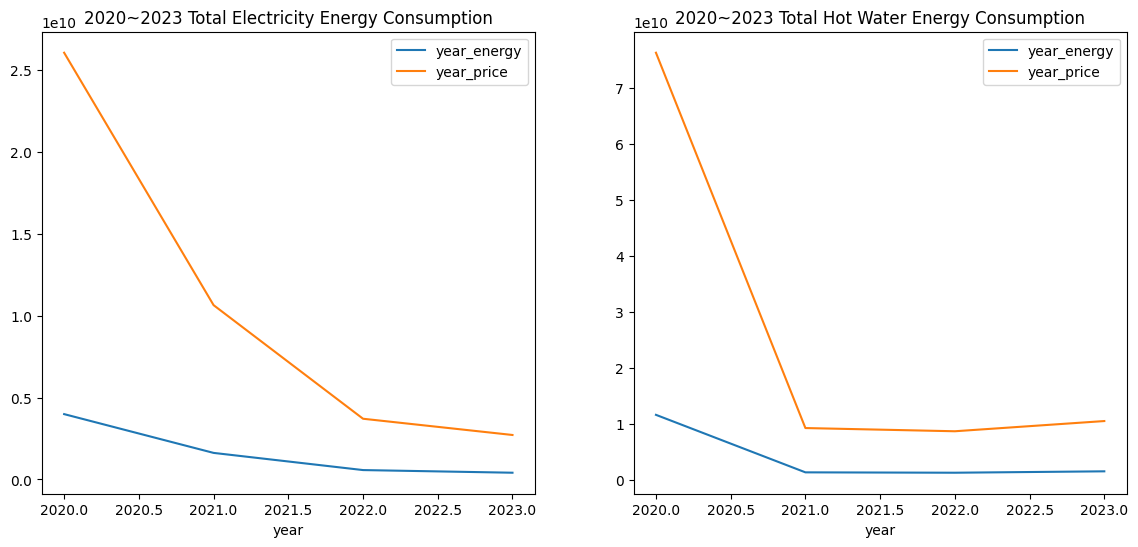

In [31]:
fig_total, ax = plt.subplots(1, 2, figsize=(14, 6))

total(long_EEU).plot(ax=ax[0])
ax[0].set_title("2020~2023 Total Electricity Energy Consumption")
total(long_HWE).plot(ax=ax[1])
ax[1].set_title("2020~2023 Total Hot Water Energy Consumption")

# **3.2 Electricity Consumption by Different Buliding Type and Weather Condition**

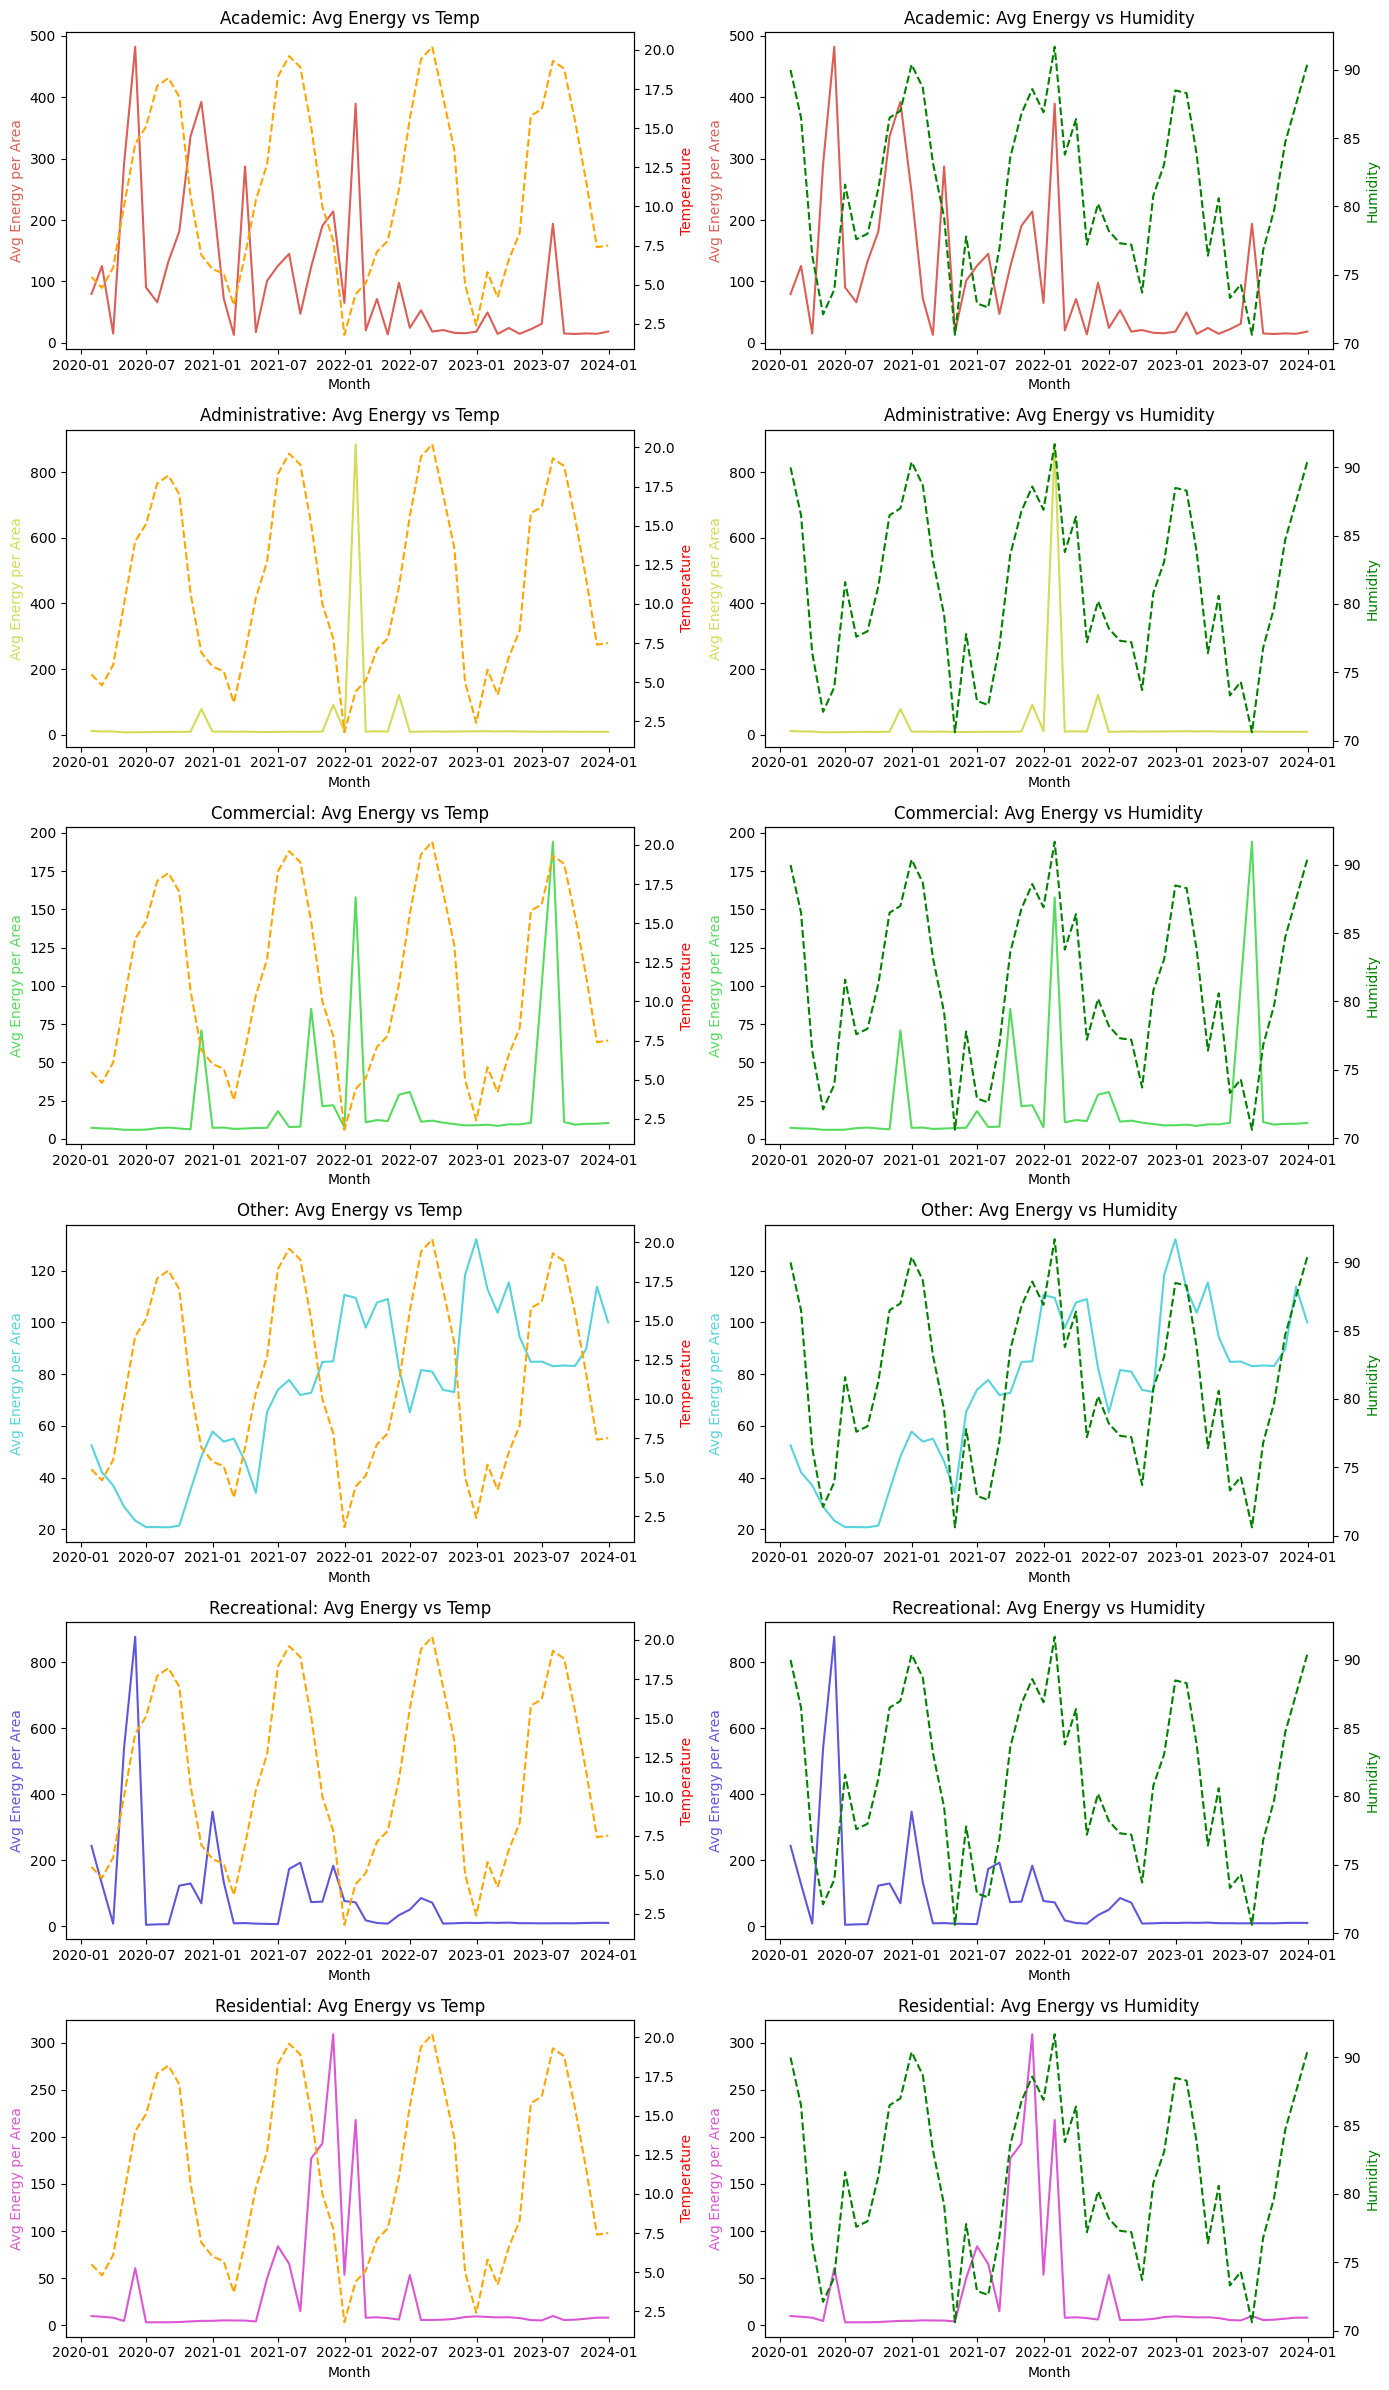

In [32]:
EEdata = ['energy_per_area', 'temp', 'humidity']

avg_data = long_EEU.groupby(['Type', 'month'], as_index=False)[EEdata].mean()

colors = sns.color_palette("hls", len(avg_data['Type'].unique()))
building_types = avg_data['Type'].unique() 

fig, axes = plt.subplots(len(building_types), 2, figsize=(14, len(building_types) * 4))

for i, buildtype in enumerate(building_types):
    buildingdata = avg_data[avg_data['Type'] == buildtype]

    # Electricity Energy per area vs temperature
    ax1 = axes[i, 0]
    ax2 = ax1.twinx()
    ax1.plot(buildingdata["month"], buildingdata["energy_per_area"], color=colors[i], label="Energy per Area")
    ax2.plot(buildingdata["month"], buildingdata["temp"], color="orange", linestyle="--", label="Temperature")
    ax1.set_title(f"{buildtype}: Avg Energy vs Temp")
    ax1.set_ylabel("Avg Energy per Area", color=colors[i])
    ax2.set_ylabel("Temperature", color="red")
    ax1.set_xlabel("Month")

    # Electricity Energy per area vs humidity
    ax1 = axes[i, 1]
    ax2 = ax1.twinx()
    ax1.plot(buildingdata["month"], buildingdata["energy_per_area"], color=colors[i], label="Energy per Area")
    ax2.plot(buildingdata["month"], buildingdata["humidity"], color="green", linestyle="--", label="Humidity")
    ax1.set_title(f"{buildtype}: Avg Energy vs Humidity")
    ax1.set_ylabel("Avg Energy per Area", color=colors[i])
    ax2.set_ylabel("Humidity", color="green")
    ax1.set_xlabel("Month")

plt.tight_layout()
plt.show()

# **3.2 Hot Water Consumption by Different Buliding Type and Weather Condition**

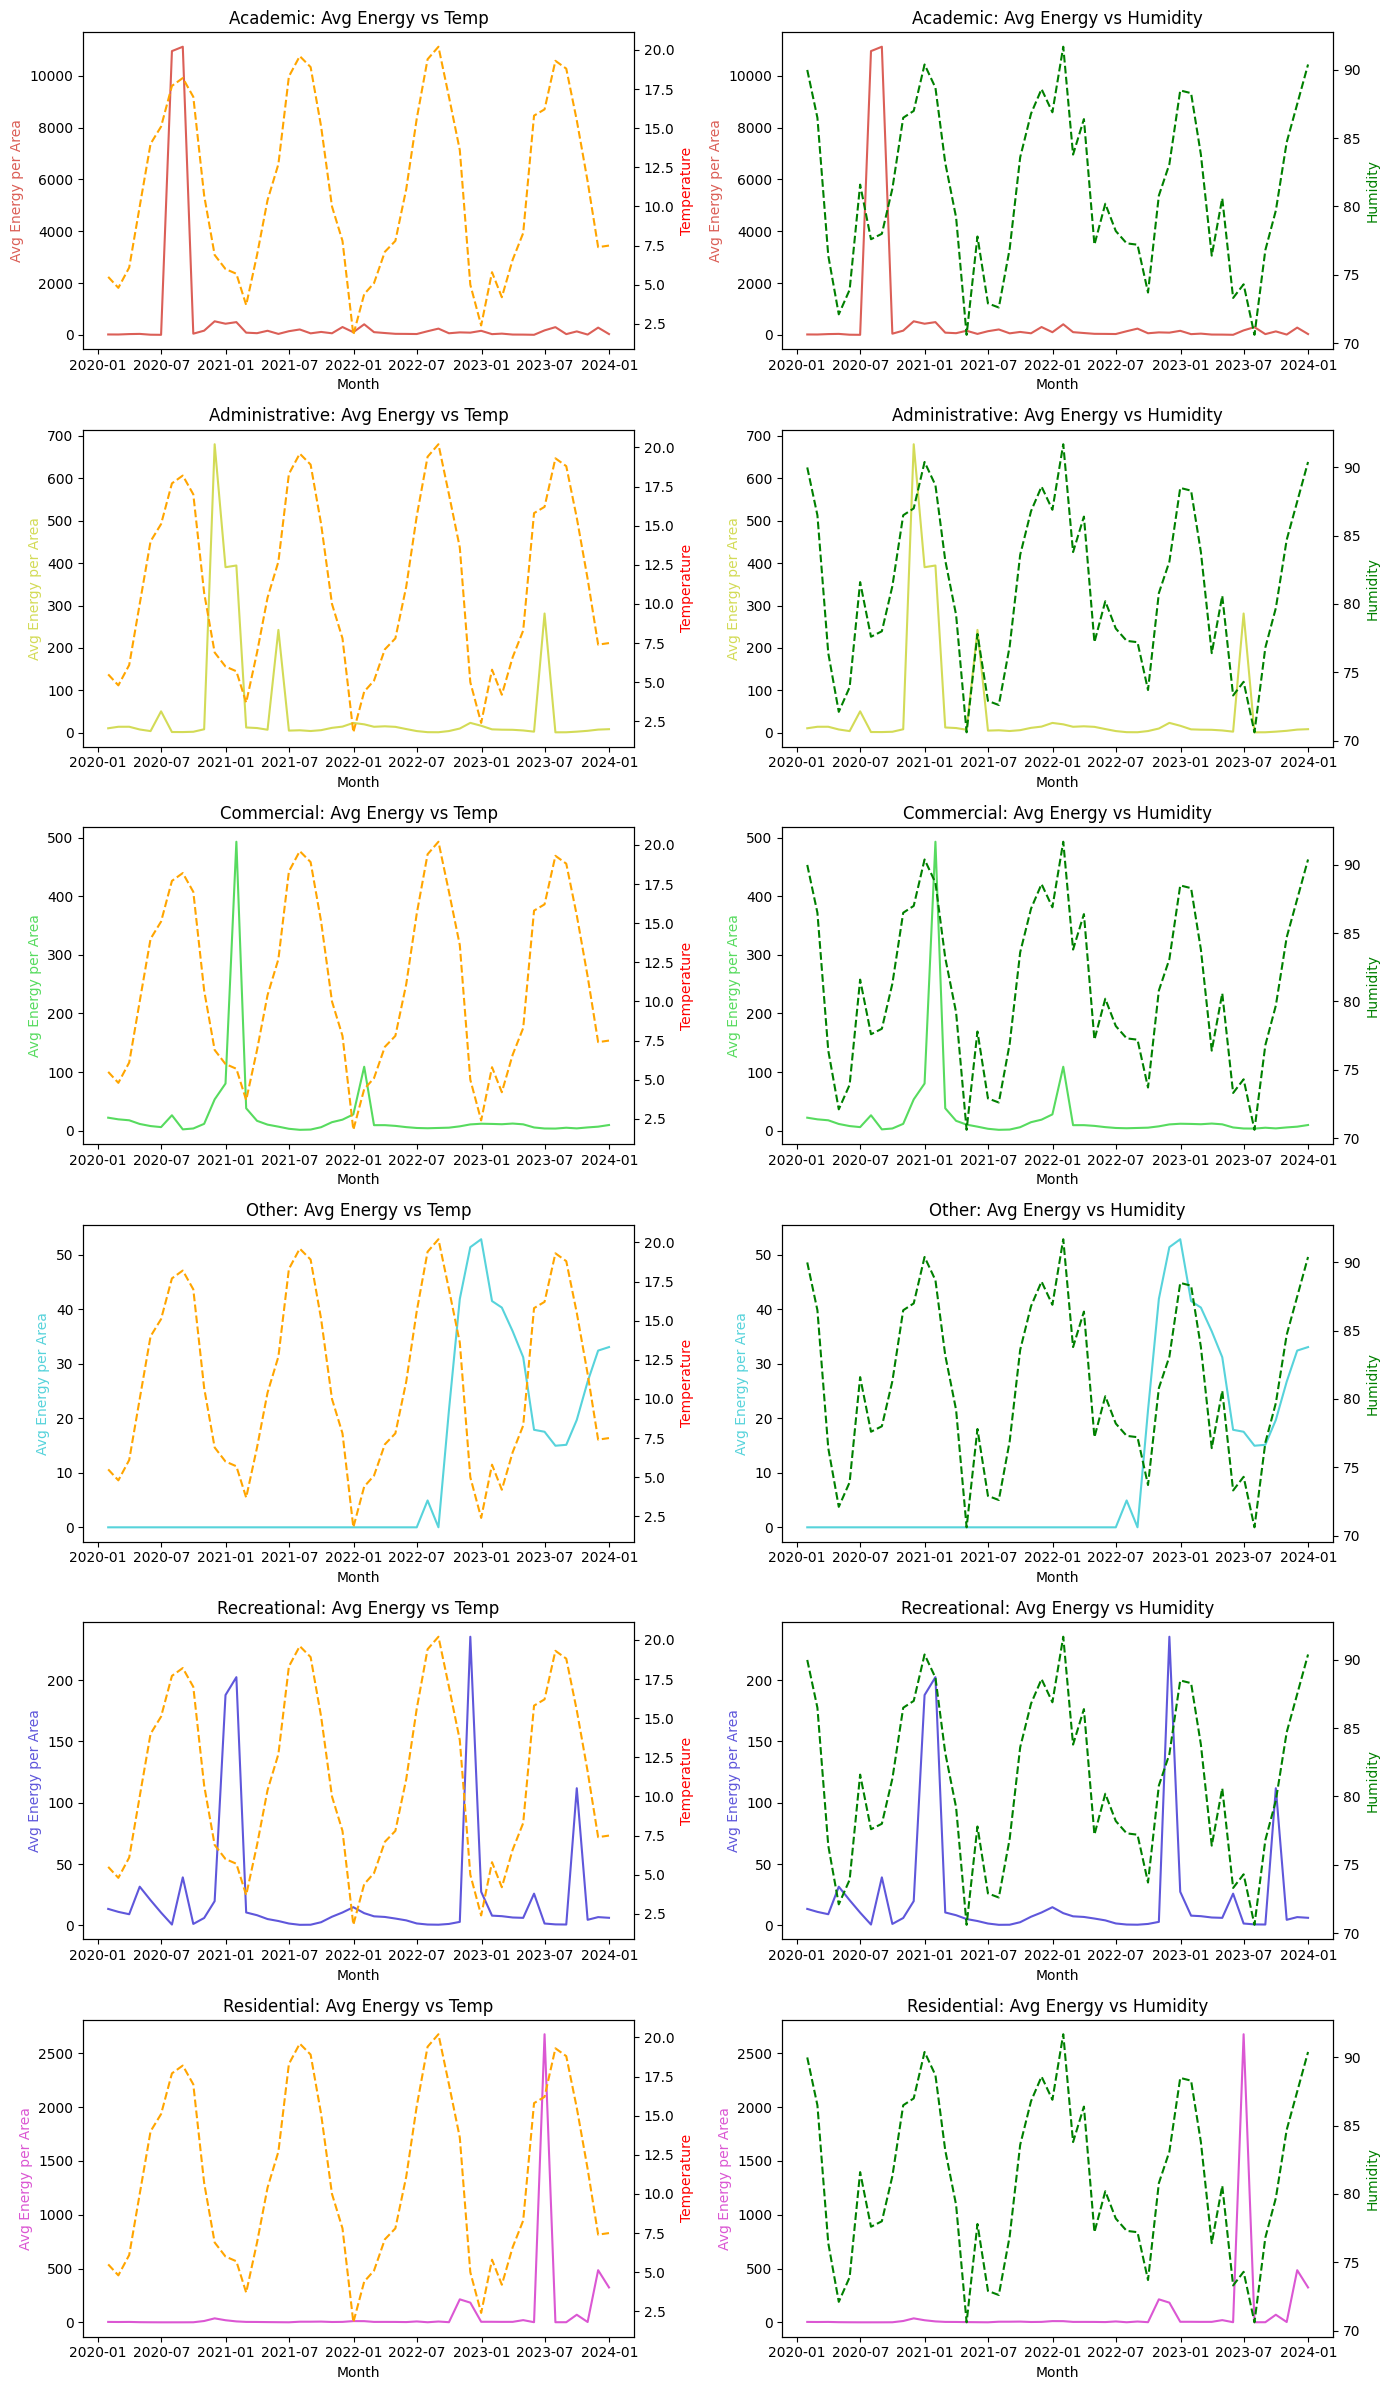

In [33]:
HWEdata = ['energy_per_area', 'temp', 'humidity']

avg_data = long_HWE.groupby(['Type', 'month'], as_index=False)[HWEdata].mean()

colors = sns.color_palette("hls", len(avg_data['Type'].unique()))
building_types = avg_data['Type'].unique() 

fig, axes = plt.subplots(len(building_types), 2, figsize=(14, len(building_types) * 4))

for i, buildtype in enumerate(building_types):
    buildingdata = avg_data[avg_data['Type'] == buildtype]

    # Hot Water Energy per area vs temperature
    ax1 = axes[i, 0]
    ax2 = ax1.twinx()
    ax1.plot(buildingdata["month"], buildingdata["energy_per_area"], color=colors[i], label="Energy per Area")
    ax2.plot(buildingdata["month"], buildingdata["temp"], color="orange", linestyle="--", label="Temperature")
    ax1.set_title(f"{buildtype}: Avg Energy vs Temp")
    ax1.set_ylabel("Avg Energy per Area", color=colors[i])
    ax2.set_ylabel("Temperature", color="red")
    ax1.set_xlabel("Month")

    # Hot Water Energy per area vs humidity
    ax1 = axes[i, 1]
    ax2 = ax1.twinx()
    ax1.plot(buildingdata["month"], buildingdata["energy_per_area"], color=colors[i], label="Energy per Area")
    ax2.plot(buildingdata["month"], buildingdata["humidity"], color="green", linestyle="--", label="Humidity")
    ax1.set_title(f"{buildtype}: Avg Energy vs Humidity")
    ax1.set_ylabel("Avg Energy per Area", color=colors[i])
    ax2.set_ylabel("Humidity", color="green")
    ax1.set_xlabel("Month")

plt.tight_layout()
plt.show()

# **4. Regession on Monthly UBC Energy Cost**
- Objective: we want to predict the school energy usage by building type, temperature, humidity, total energy, area on eletricity and hot water respectively .

# **4.1 Data Preperation**

In [34]:
short_EEU = long_EEU[long_EEU["total_price"] > 0]
x1 = short_EEU.drop(["shortName","month", "energy_per_area", "unit_price","total_price"], axis=1).copy()
y1 = np.log(short_EEU["total_price"])

In [35]:
x1_dummy = pd.get_dummies(x1, columns=["Type"], drop_first=True)

X1_train, X1_test, y1_train, y1_test = train_test_split(x1_dummy, y1, test_size=0.3, random_state=123)

#standardize
scaler = StandardScaler()
numerical_columns = x1_dummy.select_dtypes(include=['float64']).columns  # Automatically selects numeric columns
X1_train[numerical_columns] = scaler.fit_transform(X1_train[numerical_columns])
X1_test[numerical_columns] = scaler.transform(X1_test[numerical_columns])

x1_dummy.head()

,area,total_energy,humidity,temp,Type_Administrative,Type_Commercial,Type_Other,Type_Recreational,Type_Residential
0,"5,368.00","37,644.00",90.00,5.50,False,False,False,False,False
1,"5,368.00","34,610.50",86.50,4.80,False,False,False,False,False
2,"5,368.00","32,041.00",76.40,6.10,False,False,False,False,False
3,"5,368.00","23,551.00",72.10,10.00,False,False,False,False,False
4,"5,368.00","23,795.50",73.90,14.00,False,False,False,False,False


# **4.2 Random Forest Model**

In [36]:
forest = RandomForestRegressor(n_estimators = 100, random_state=123)
forest.fit(X1_train, y1_train)
print("Random Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y1_test, forest.predict(X1_test)))
print("R² Score:", r2_score(y1_test, forest.predict(X1_test)))

Random Forest Regression:
Mean Squared Error: 0.0007960717743588413
R² Score: 0.9996074628755462


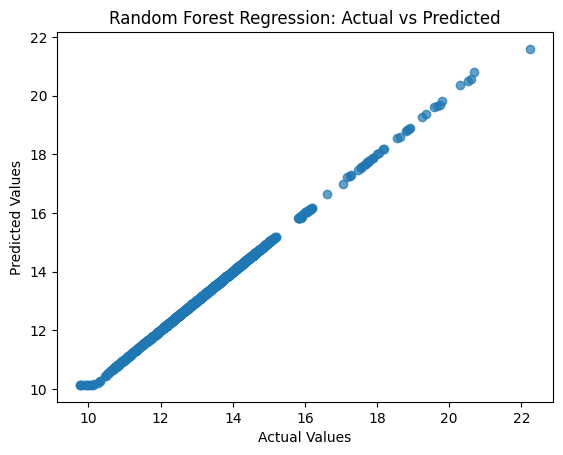

In [37]:
plt.scatter(y1_test, forest.predict(X1_test), alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

In [38]:
feature_names = [f"Feature {i}" for i in range(X1_train.shape[1])]
importances = forest.feature_importances_
importances
importance_df = pd.DataFrame({
    "Feature": X1_train.columns,
    "Importance": importances
})
importance_df["Importance"] = importance_df["Importance"].round(4)
importance_df

,Feature,Importance
0,area,0.00
1,total_energy,1.00
2,humidity,0.00
3,temp,0.00
4,Type_Administrative,0.00
5,Type_Commercial,0.00
6,Type_Other,0.00
7,Type_Recreational,0.00
8,Type_Residential,0.00


From the Random Forest Regression, we see that total energy is the only factor that is related to toal cost, which is reasonable.
However, we still want to know the underlying relationship between the inputs and energy consumption.
Therefore, we decided to change perspective and look into the regression of predicting total energy usage instead.

# **5. Regession on Monthly UBC Electricity Energy Usage**
- Objective: we want to predict the school energy usage by building type, temperature, humidity, area on eletricity and hot water respectively.

# **5.1 Data Preperation**

In [39]:
short_EEU = long_EEU[long_EEU["total_energy"] > 0]
x1 = short_EEU.drop(["shortName","month", "energy_per_area", "unit_price","total_price", "total_energy"], axis=1).copy()
y1 = np.log(short_EEU["total_energy"])

In [40]:
x1_dummy = pd.get_dummies(x1, columns=["Type"], drop_first=True)

X1_train, X1_test, y1_train, y1_test = train_test_split(x1_dummy, y1, test_size=0.3, random_state=123)

#standardize
scaler = StandardScaler()
numerical_columns = x1_dummy.select_dtypes(include=['float64']).columns  # Automatically selects numeric columns
X1_train[numerical_columns] = scaler.fit_transform(X1_train[numerical_columns])
X1_test[numerical_columns] = scaler.transform(X1_test[numerical_columns])

x1_dummy.head()

,area,humidity,temp,Type_Administrative,Type_Commercial,Type_Other,Type_Recreational,Type_Residential
0,"5,368.00",90.00,5.50,False,False,False,False,False
1,"5,368.00",86.50,4.80,False,False,False,False,False
2,"5,368.00",76.40,6.10,False,False,False,False,False
3,"5,368.00",72.10,10.00,False,False,False,False,False
4,"5,368.00",73.90,14.00,False,False,False,False,False


# **5.2 Model Fitting**

## 5.2.1. Multivaribale Linear Regression

In [41]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X1_train, y1_train)

# Predict on test set
y_pred_lin1 = lin_reg1.predict(X1_test)

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y1_test, y_pred_lin1))
print("R² Score:", r2_score(y1_test, y_pred_lin1))

Linear Regression:
Mean Squared Error: 1.3160916686859947
R² Score: 0.35101464745138866


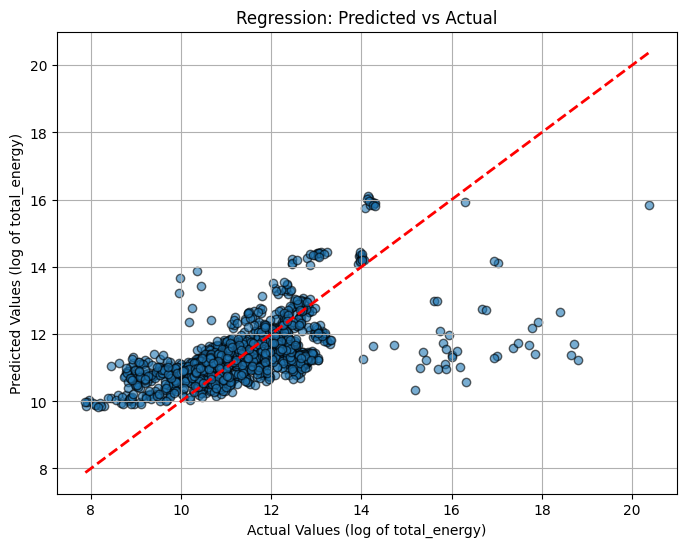

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y_pred_lin1, alpha=0.6, edgecolor="k")
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color="red", linestyle="--", linewidth=2)
plt.title("Regression: Predicted vs Actual")
plt.xlabel("Actual Values (log of total_energy)")
plt.ylabel("Predicted Values (log of total_energy)")
plt.grid(True)
plt.show()

## 5.2.2. LASSO Regression by 5-Fold Cross Validation

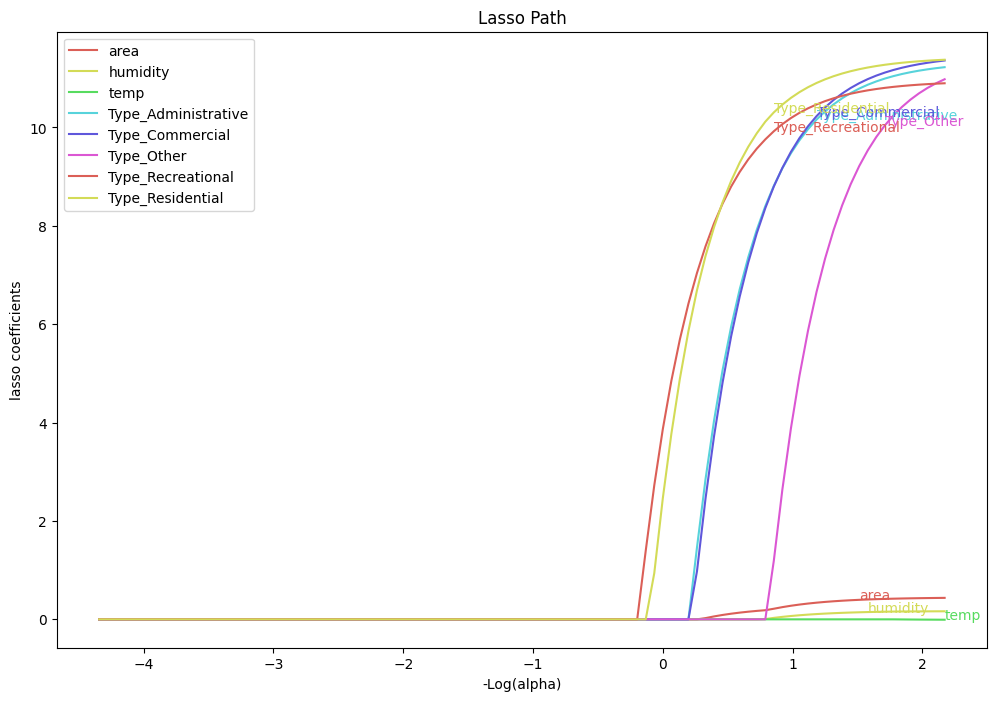

In [43]:
#LASSO path
alphas = np.exp(np.linspace(10, -5, 100))
alphas, coefs_lasso, _ = linear_model.lasso_path(X1_train, y1_train, alphas=alphas, max_iter=10000)

fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X1_train)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)
   ax.legend(list(X1_train))

In [44]:
lasso = linear_model.LassoCV(cv=5).fit(X1_train,y1_train)
a = lasso.alpha_
a

np.float64(0.0021279131223217937)

In [45]:
lasso1 = Lasso(alpha = a)
lasso1.fit(X1_train, y1_train)
y_pred_lin = lasso1.predict(X1_test)
print("LASSO cv5:")
print("Mean Squared Error:", mean_squared_error(y1_test, y_pred_lin))
print("R² Score:", r2_score(y1_test, lasso1.predict(X1_test)))

LASSO cv5:
Mean Squared Error: 1.3184992277527454
R² Score: 0.3498274424816339


In [46]:
pd.DataFrame(lasso1.coef_, index=X1_train.columns, columns=["lasso_coef"])

,lasso_coef
area,0.88
humidity,0.12
temp,0.01
Type_Administrative,-0.08
Type_Commercial,-0.00
Type_Other,0.28
Type_Recreational,-0.44
Type_Residential,-0.36


## 5.2.3. Random Forest

In [47]:
forest1 = RandomForestRegressor(n_estimators = 200,  max_depth=20, random_state=123)
forest1.fit(X1_train, y1_train)
print("Random Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y1_test, forest1.predict(X1_test)))
r2 = r2_score(y1_test, forest1.predict(X1_test))
print("R² Score:", round(r2, 10))

Random Forest Regression:
Mean Squared Error: 0.7884334197775476
R² Score: 0.6112111694


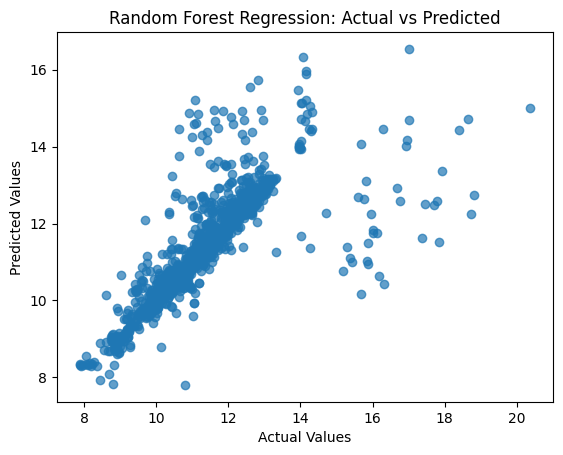

In [48]:
plt.scatter(y1_test, forest1.predict(X1_test), alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

In [49]:
feature_names = [f"Feature {i}" for i in range(X1_train.shape[1])]
importances = forest1.feature_importances_
importances
importance_df = pd.DataFrame({
    "Feature": X1_train.columns,
    "Importance": importances
})
importance_df["Importance"] = importance_df["Importance"].round(4)
importance_df

,Feature,Importance
0,area,0.67
1,humidity,0.13
2,temp,0.11
3,Type_Administrative,0.01
4,Type_Commercial,0.03
5,Type_Other,0.00
6,Type_Recreational,0.02
7,Type_Residential,0.02


# **5.3 Interpretations**

**1. Multivariable Regression**: 
- The Mean Squared Error (MSE) is 1.316, R² Score is 0.351. 
- This model can only explain 35.1% of the variance of the target variable, indicating that Multivariable regression did not fit the data well. MSE=1.316 suggests that the model has a large prediction error, especially when dealing with larger values (when the energy value is greater than 13). 
- The main reason for the Multivariable Regression is that the linear model cannot capture the nonlinear relationships in the data and the features may be insufficient or multicollinearity may affect the stability of the regression coefficients.

   
**2. Lasso**: 
- The MSE is 1.318, R² Score is 0.350. 
- This model can only explain 35.0% of the variance of the target variable. The performance of Lasso is similar to that of multivariable regression. 
- By analyzing the positive or negative of coefficients, we can find that:
    - `area`, `humidity`, `temp` and `Type_Other` are positive correlated with target variable. The positive coefficients means that when these factors increase, the target variable will also increase. 
    - `Type_Administrative`, `Type_Recreational`, `Type_Residential`, these factors have negative coefficients and thus have negative relationship with targat variable. 
    - interestingly, the coefficient of `Type_Commercial` is zero, so it means that no matter the changes of `Type_Commercial`, the target variable will not be influenced.
- This model still has some problems, as we see that the coefficients of `temp` and `humidity` are positive, they happen to be very small (0.119603 and 0.006682), which indicates that these features may have a weak impact on the target variable. However, these features are actually important by the importance dataframe we made in Random Forest. Regularization weakens their impact, which may lead to a decrease in the predictive performance of the model. 

    If the trends between these features are relatively similar (as shown in the graph, the correlation between `area`, `temp`, and `humidity` is high), Lasso will tend to choose one of the features and ignore the other features. `Type-Recreational` and `Type-Residential` have a lower correlation with the target variable, resulting in a negative coefficient. 
    
    In this case, negative coefficients are reasonable and reflect the true contribution of features to the target variable. However, if there is noise or outliers in the data, these points may mislead the model fitting, causing the model to mistakenly believe that certain features have a negative impact on the target variable. 
    
    The results of the model may violate our expectations, but this does not mean that the model is incorrect. It may be due to flawed assumptions in the logic or we  neglect some certain implicit relationships.This method will simplify the model, but it may lead to an increase in inaccurate predictions.
   
**3. Random forest**: 
- The Mean Squared Error (MSE) is 0.789, R² Score is 0.611. 
- This model can explain 61.1% of the variance of the target variable.
- `area` has the greatest importance to the model, indicating that this feature has the most significant impact on the target variable. `humidity` and `temperature` comes in next, also showing importance. 
- However, there still appear some problems from the scatter plot, it can be seen that in the areas with higher target values (16-20), the model's prediction bias is relatively large, which may be due to insufficient data or excessive noise.In additoin,random forests may have a risk of overfitting due to high model complexity (n_estimators=200 and max_depth=20). By the way, random forest requires training multiple decision trees, which has a high computational complexity, especially when the amount of data or feature dimensions increases.

**Conclusion**:

By comparing Mean Squared Error (MSE) and R² Score, **Random forest performs best in three models** since it has the lowest MSE and the highest R² Score.

# **6. Regression on Monthly UBC Hot Water Energe Use**
# **6.1 Data Preperation**

In [50]:
short_HWE = long_HWE[long_HWE["total_energy"] > 0]
x2 = short_HWE.drop(["shortName","month", "energy_per_area", "unit_price","total_price", "total_energy"], axis=1).copy()
y2 = np.log(short_HWE["total_energy"])

In [51]:
x2_dummy = pd.get_dummies(x2, columns=["Type"], drop_first=True)

X2_train, X2_test, y2_train, y2_test = train_test_split(x2_dummy, y2, test_size=0.3, random_state=123)

#standardize
scaler = StandardScaler()
numerical_columns = x2_dummy.select_dtypes(include=['float64']).columns  # Automatically selects numeric columns
X2_train[numerical_columns] = scaler.fit_transform(X2_train[numerical_columns])
X2_test[numerical_columns] = scaler.transform(X2_test[numerical_columns])

x2_dummy.head()

,area,humidity,temp,Type_Administrative,Type_Commercial,Type_Other,Type_Recreational,Type_Residential
0,"5,368.00",90.00,5.50,False,False,False,False,False
1,"5,368.00",86.50,4.80,False,False,False,False,False
2,"5,368.00",76.40,6.10,False,False,False,False,False
3,"5,368.00",72.10,10.00,False,False,False,False,False
4,"5,368.00",73.90,14.00,False,False,False,False,False


# **6.2 Model Fitting**

## 6.2.1. Multivaribale Linear Regression

In [52]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y2_train)

# Predict on test set
y_pred_lin2 = lin_reg2.predict(X2_test)

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y2_test, y_pred_lin2))
print("R² Score:", r2_score(y2_test, y_pred_lin2))

Linear Regression:
Mean Squared Error: 2.9291922696283517
R² Score: 0.32974146142098415


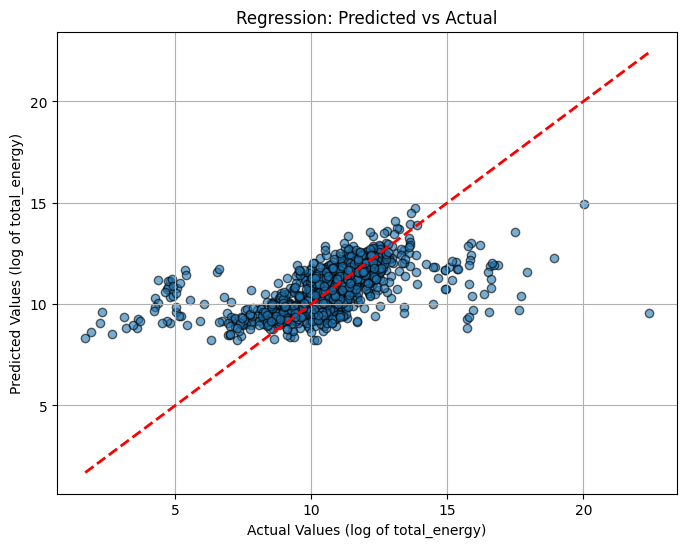

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y_pred_lin2, alpha=0.6, edgecolor="k")
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color="red", linestyle="--", linewidth=2)
plt.title("Regression: Predicted vs Actual")
plt.xlabel("Actual Values (log of total_energy)")
plt.ylabel("Predicted Values (log of total_energy)")
plt.grid(True)
plt.show()

## 6.2.2. LASSO Regression by 5-Fold Cross Validation

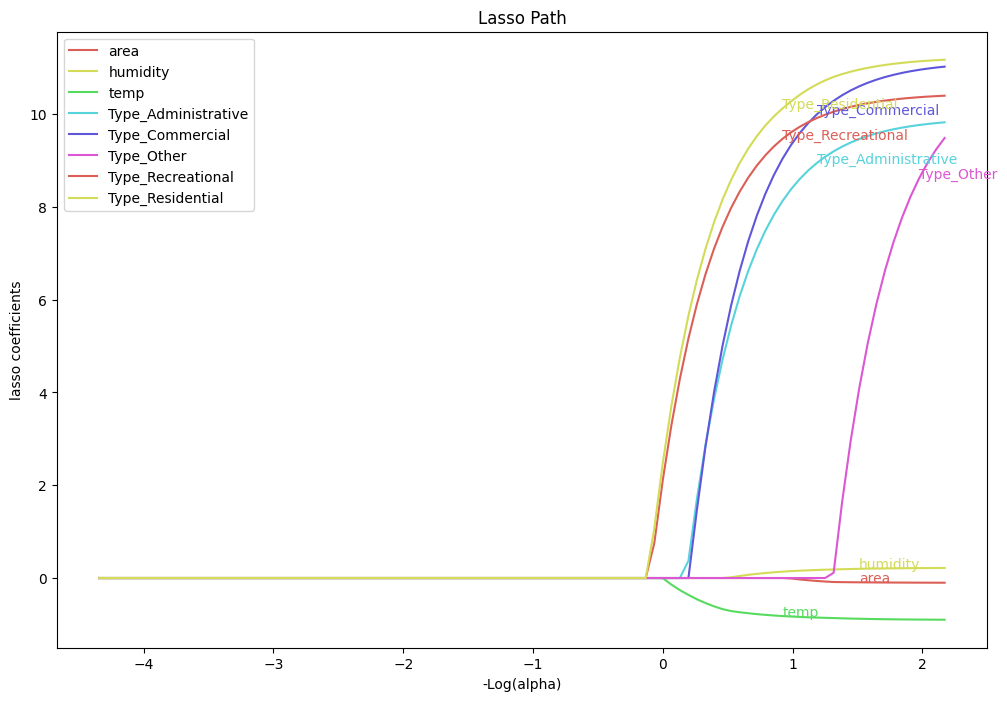

In [54]:
#LASSO path
alphas = np.exp(np.linspace(10, -5, 100))
alphas, coefs_lasso, _ = linear_model.lasso_path(X2_train, y2_train, alphas=alphas, max_iter=10000)

fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X2_train)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)
   ax.legend(list(X2_train))

In [55]:
lasso2 = linear_model.LassoCV(cv=5).fit(X2_train,y2_train)
b = lasso2.alpha_
b

np.float64(0.0030713153299352642)

In [56]:
lasso2 = Lasso(alpha = b)
lasso2.fit(X2_train, y2_train)
y_pred_lin3 = lasso2.predict(X2_test)
print("LASSO cv5:")
print("Mean Squared Error:", mean_squared_error(y2_test, y_pred_lin3))
print("R² Score:", r2_score(y2_test, lasso2.predict(X2_test)))

LASSO cv5:
Mean Squared Error: 2.9378871619671707
R² Score: 0.32775189388984416


In [57]:
pd.DataFrame(lasso2.coef_, index=X2_train.columns, columns=["lasso_coef"])

,lasso_coef
area,0.46
humidity,0.20
temp,-0.87
Type_Administrative,-0.99
Type_Commercial,0.21
Type_Other,0.00
Type_Recreational,-0.43
Type_Residential,-0.15


## 6.2.3. Random Forest

In [58]:
forest2 = RandomForestRegressor(n_estimators = 200,  max_depth=20, random_state=123)
forest2.fit(X2_train, y2_train)
print("Random Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y2_test, forest2.predict(X2_test)))
r2 = r2_score(y2_test, forest2.predict(X2_test))
print("R² Score:", round(r2, 10))

Random Forest Regression:
Mean Squared Error: 1.641764798099842
R² Score: 0.624330951


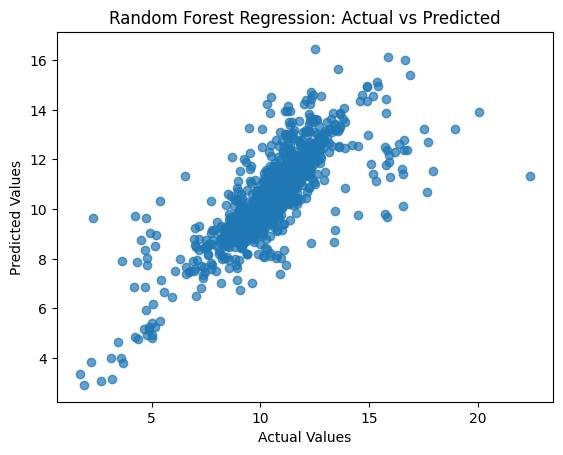

In [59]:
plt.scatter(y2_test, forest2.predict(X2_test), alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

In [60]:
feature_names = [f"Feature {i}" for i in range(X2_train.shape[1])]
importances = forest2.feature_importances_
importances
importance_df = pd.DataFrame({
    "Feature": X2_train.columns,
    "Importance": importances
})
importance_df["Importance"] = importance_df["Importance"].round(4)
importance_df

,Feature,Importance
0,area,0.47
1,humidity,0.12
2,temp,0.34
3,Type_Administrative,0.02
4,Type_Commercial,0.01
5,Type_Other,0.00
6,Type_Recreational,0.02
7,Type_Residential,0.02


# **6.3 Interpretations**
**1. Multivariable Regression**: 
- The Mean Squared Error (MSE) is 2.929, R² Score is 0.330. 
- This model can only explain 33.0% of the variance of the target variable, indicating that Multivariable regression did not fit the data well. 
- MSE=2.929 suggests that the model has a large prediction error, when dealing with larger values or lower values. According to the graph, lower value(<6) and higher lower(>14) perform not well in this regression. 
- The main reason for the Multivariable Regression is that the linear model cannot capture the nonlinear relationships in the data and the features may be insufficient or multicollinearity may affect the stability of the regression coefficients.

**2. Lasso**:
- The Mean Squared Error (MSE) is 2.938, R² Score is 0.328. 
- This model can only explain 32.8% of the variance of the target variable. 
- As we observe the coefficients we can see that:
    - `area`, `humidity` and `Type_Commercial` has positive relationship with target variable. When these factors increase, it will lead to target variable have same trend. 
    - `temp`,`Type_Administrative`, `Type_Recreational` and `Type_Residential` have negative coefficient, it means when these factors increase and target variable will decrease. 
    - `Type_Other` has zero coefficient, so it has no effect on target variable and will not influence our result.

- In this model, `area` and `humidity` appear to play significant roles. However, an interesting observation is the negative coefficient for `temp`. Typically, when analyzing monthly electricity usage at UBC, the coefficient for `temp` is positive, which aligns with the expectation that warmer temperatures would reduce energy usage for heating. However, in this model, temp has a large negative coefficient.

    This phenomenon can be explained by the natural relationship between temperature and energy usage during colder weather, where people increase hot water usage. 
    
    Additionally, when examining the graph, we observed that the trend of `temp` is similar to those of `area` and `humidity`. This suggests that the negative coefficient for `temp` may result from strong multicollinearity with `area` and `humidity`. Due to this multicollinearity, LASSO likely prioritizes `area` and `humidity` during regularization while suppressing `temp` by assigning it a large negative coefficient.
    
    Similarly, `Type_other` is compressed to zero by LASSO, possibly due to its strong correlation with other types, which led the model to select other features and exclude it. 
- Regularization may lead to important features being mistakenly identified as unimportant, thereby reducing the predictive ability of the model.


**3. Random forest**:
- The Mean Squared Error (MSE) is 1.642, R² Score is 0.624. 
- This model can explain 62.5% of the variance of the target variable.
- Similar to the electricity regression, `area` has the greatest contribution to the model, indicating that this feature has the most significant impact on the target variable. `Humidity` and `temp` contribute 12.12% and 33.57% respectively, which are also important features. 
- Compared with multiple linear regression (MSE=2.93) and LASSO regression (MSE=2.94), the error of random forest is significantly lower, indicating higher prediction accuracy. 
- However, this model still has some problems. In the graph, there are still significant deviations at certain points, especially in the larger range of values of the target variable. Moreover, Random forests may have a risk of overfitting due to their high model complexity (n_estimators=200 and max_depth=20).

**Conclusion**:

By comparing Mean Squared Error (MSE) and R² Score, **Random forest performs best in three models** since it has the lowest MSE and the highest R² Score.

# **7. Results**

## 7.1 Findings
- It is known that cost is directly related to total energy usage. So, by predicting the total energy usage, we are also predicting the total cost.
- By analyzing the coefficients of the models, we see that area, temperature and humidty are important inputs for predicting both total eletricity and total hot water energy consumption. These variables represent the basics of energy use, as the size of the building (area), weather-related heating needs (temperature), and moisture-related energy demands (humidity) contribute mainly towards energy consumption.

   In contrast, building type appears to have a relatively minor relation. This may be because energy consumption patterns across different building types are highly similar.

   This finding shows the importance of understanding how environmental and physical aspects of a architecture is related to energy usage patterns. For further research, comparing more different types of buildings in various locations may be an aspect to take into account since this project only focuses on campus building and has limitation. 

- In both energy regression model selections, we see that Ransom Forest outstands multivariable linear regression and LASSO. This is due to its ability to capture non-linear relationships and interactions between variables, which linear models like multivariable linear regression and LASSO cannot effectively achieve. Since we have 8 input variables, the true relationship between them and the target value is very likely to be non-linear. Thus, linear models will perform poorly unless special features are introduced.

- Random Forest has strong noise resistance, making it capable of handling missing and outlier data, which linear models are more sensitive to. Moreover, by integrating multiple decision trees, Random Forest can automatically select important features and reduce the risk of overfitting, making it perform better in high-dimensional data scenarios. Therefore, Random Forest is a more suitable choice for predicting total energy usage and the associated costs.




## 7.2 Answer to Research Questions
**1. What is the current building energy consumption of the campus?**


By examining the visualizations and tables in Section 3 of this project, we observe a notable decrease in total energy consumption and costs from 2020 to 2023. This trend reflects UBC's ongoing efforts to become a 100% sustainable campus, emphasizing energy efficiency and cost reduction.

The mean yearly energy consumption and price for electricity are approximately 1,648,307,420.05 kWh/m² and $10,771,747,608.98, respectively. 

The mean yearly energy consumption and price for electricity are approximately 4,013,592,299.28 kWh/m² and $26,219,769,681.07, respectively.

Comparing these numbers, we see that hot water consumption exceeds electricity consumption in both energy usage and cost.

This significant difference underscores the need for strategies to manage hot water energy usage more efficiently. Efforts such as improving water systems, and promoting water conservation could further contribute to UBC's sustainability goals. 


In [61]:
total(long_EEU).mean()

year_energy    1,648,307,420.05
year_price    10,771,747,608.98
dtype: float64

In [62]:
total(long_HWE).mean()

year_energy    4,013,592,299.28
year_price    26,219,769,681.07
dtype: float64


**2. What are the key factors that influence energy consumption across different building types(e.g. Academic, Residential, Research)?**

   According to these three models, we can find that `area`, `humidity`, `temperature` are key factors that influence energy consumption across different building types.

**3. How accurate are the predictions that are made with machine learning?**
 
   Random Forest, through its ensemble learning characteristics and the splitting mechanism of decision trees, can better handle issues of multicollinearity and more accurately evaluate the contribution of each variable to total energy consumption. 

   The MSE values (0.789, 1,642) are better than multivariable linear regression and LASSO, but indicate that prediction errors can still be significant, particularly for larger values of the target variable.
   
   With R² scores over 60%, the models explain a significant portion of the variance for the target variable. Whereas, about 40% of the variance still remains unexplained, indicating room for improvement.

   Overall, Random Forest shows a decent predictive accuracy, indicating its ability in dealing with complex relationships and high-dimensional data, making it a more suitable choice for predicting total energy usage and associated costs. However, issues like prediction bias for extreme values and overfitting risk still need to be addressed for further improvement, especially for larger target values where more errors are found.



**4. How can UBC use the results to optimize energy usage and reduce costs?**

   Based on the analysis, UBC can take several methods to optimize energy use and cut costs. 
   
   For key buildings like administrative, recreational, and residential ones, smart thermostats, motion-sensor lighting, and building automation systems can be added. Older buildings can be improved with better insulation and energy-efficient equipment. 
   
   Predictive models can help adjust energy use, reduce waste during off-peak times, and focus maintenance on high-energy areas. Renewable energy like solar panels and geothermal systems can also support high-energy buildings. UBC can create energy-saving programs to encourage innovative ideas and use dashboards to raise awareness. 
   
   For long-term impact, UBC can use models to design more efficient buildings, set energy-saving goals, limit peak-time energy use, and promote green standards. These steps will help reduce waste, save money, and support sustainability goals.

## 7.3 Area of Improvements
- **Limit model complexity to reduce overfitting**: To address overfitting in regression models, we could reduce the depth of trees or limit the number of splits in the Random Forest models. These methods will help prevent the model from capturing random noise in the complicated data, thereby improving generalization.

- **Check for multicollinearity**: Before performing regression analysis, it is crucial to check for multicollinearity among inputted predictors. High multicollinearity can cause errored coefficients, lead to low model interpretability, and negatively impact stability. By identifying and removing redundant variables, we can simplify the model, improve stability, and reduce potential overfitting issues.

## 7.4 References:

- skyspark.energy. The University of British Columbia. (n.d.). https://skyspark.energy.ubc.ca/ui/lobby/

- General Service Business Rates. BC Hydro - Power smart. (n.d.). https://app.bchydro.com/accounts-billing/rates-energy-use/electricity-rates/business-rates.html